In [22]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

root = r"C:/Users/amand/Documents/Prosjektoppgave/Ledarunner/runs/05_12_25/run_10_44"
cases = [c for c in os.listdir(root) if c.startswith("case_")]

def load_csv(path):
    # LedaFlow CSVs are not UTF-8 encoded
    for enc in ["latin1", "cp1252", "utf-8"]:
        try:
            return pd.read_csv(path, encoding=enc)
        except:
            pass
    raise ValueError("Could not read CSV with common encodings.")


def clean_numeric(df):
    """Convert ALL non-time columns to numeric if possible."""
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="ignore")
    return df


results = []

for case in cases:
    case_path = os.path.join(root, case)
    trends = os.path.join(case_path, "trends")

    inj = clean_numeric(load_csv(os.path.join(trends, "InjectionPoint.csv")))
    up  = clean_numeric(load_csv(os.path.join(trends, "Upstream.csv")))
    wh = clean_numeric(load_csv(os.path.join(trends, "Wellhead.csv")))

    # steady-state window = last 10%
    n = max(1, len(inj) // 10)

    # --- Auto-detect mass-flow column ---
    mfr_candidates = [c for c in inj.columns if "MFR" in c]
    mfr_values = {}

    for c in mfr_candidates:
        try:
            v = inj[c].tail(n).astype(float).mean()
            mfr_values[c] = v
        except:
            pass

    # pick the *largest* mass-flow column (real flowrate)
    mfr_col = max(mfr_values, key=lambda c: abs(mfr_values[c]))
    MFR = mfr_values[mfr_col]

    # --- Detect pressure column ---
    P_in_col = [c for c in inj.columns if "Pressure" in c][0]
    dP_col   = [c for c in up.columns if "Pressure drop - total" in c][0]
    wh_temp_col = [c for c in wh.columns if "Temperature - average" in c][0]

    P_in = inj[P_in_col].tail(n).astype(float).mean()
    dP   = up[dP_col].tail(n).astype(float).mean()
    T_wh = wh[wh_temp_col].tail(n).astype(float).mean()

    results.append({
        "case": case,
        "mass_flow_rate": MFR,
        "inlet_pressure_bar": P_in,
        "pressure_drop_bar": dP,
        "wellhead_temp_C": T_wh,
        
    })

df = pd.DataFrame(results).sort_values("mass_flow_rate")
df

C:\Users\amand\AppData\Local\Temp\ipykernel_23732\3032265740.py:22: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
C:\Users\amand\AppData\Local\Temp\ipykernel_23732\3032265740.py:22: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
C:\Users\amand\AppData\Local\Temp\ipykernel_23732\3032265740.py:22: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
C:\Users\amand\AppData\Local\Temp\ipykernel_23732\3032265740.py:22: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_n

,case,mass_flow_rate,inlet_pressure_bar,pressure_drop_bar,wellhead_temp_C
0,case_001,20.0,90.687434,10.695846,3.371305
1,case_002,30.0,103.655764,23.674248,2.614550
2,case_003,40.0,121.254387,41.286544,1.745370
3,case_004,50.0,143.148920,63.198110,0.878283
4,case_005,60.0,169.053495,89.122864,0.084560


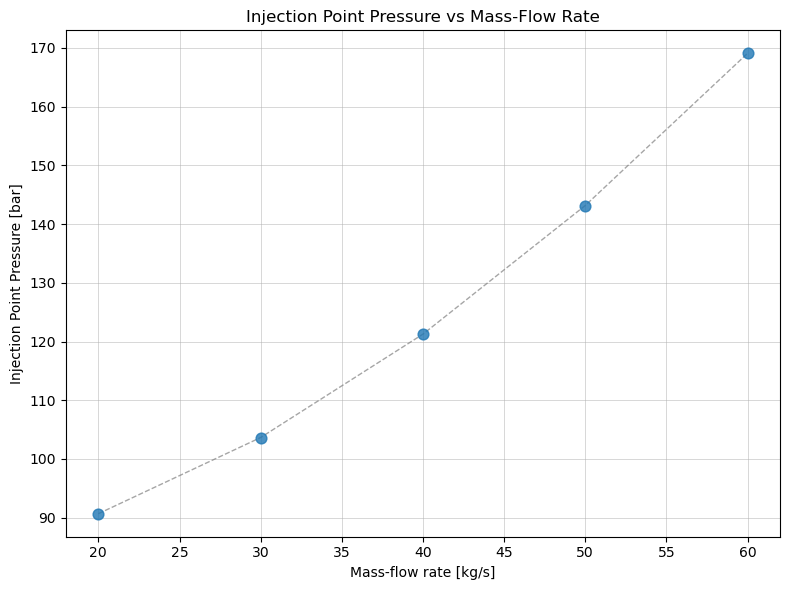

In [23]:

plt.figure(figsize=(8,6))

# Plot points (all same size)
plt.scatter(
    df["mass_flow_rate"],
    df["inlet_pressure_bar"],
    s=60,
    alpha=0.8,
    label="Inlet pressure",
    zorder=3
)

# Connect points with a dashed line
plt.plot(
    df["mass_flow_rate"],
    df["inlet_pressure_bar"],
    linestyle="--",
    linewidth=1,
    color="grey",
    alpha=0.7,
    zorder=2
)

plt.xlabel("Mass-flow rate [kg/s]")
plt.ylabel("Injection Point Pressure [bar]")
plt.title("Injection Point Pressure vs Mass-Flow Rate")
plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7, zorder=1)


plt.tight_layout()
plt.show()

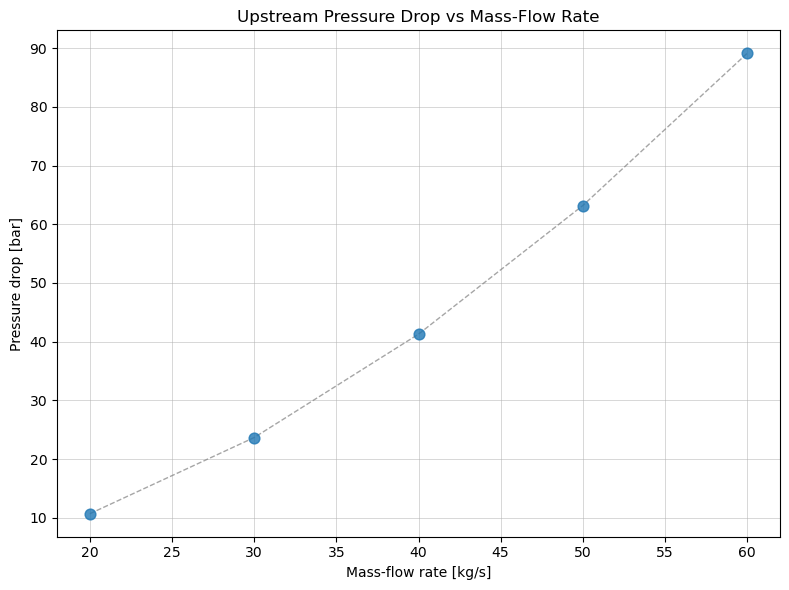

In [24]:
plt.figure(figsize=(8,6))

# Plot points (all same size)
plt.scatter(
    df["mass_flow_rate"],
    df["pressure_drop_bar"],
    s=60,
    alpha=0.8,
    label="Pressure drop",
    zorder=3
)

# Connect points with a dashed line
plt.plot(
    df["mass_flow_rate"],
    df["pressure_drop_bar"],
    linestyle="--",
    linewidth=1,
    color="grey",
    alpha=0.7,
    zorder=2
)

plt.xlabel("Mass-flow rate [kg/s]")
plt.ylabel("Pressure drop [bar]")
plt.title("Upstream Pressure Drop vs Mass-Flow Rate")
plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7, zorder=1)

plt.tight_layout()
plt.show()

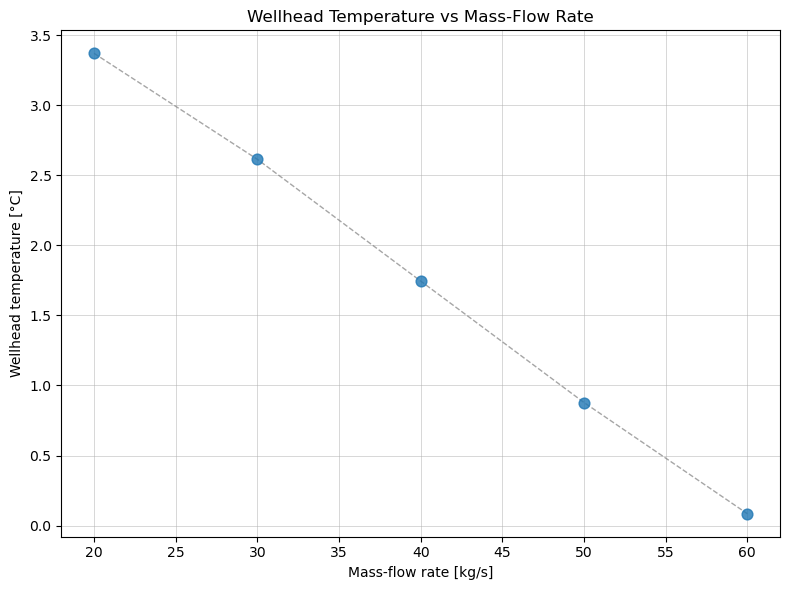

In [25]:
plt.figure(figsize=(8,6))

# Plot points (all same size)
plt.scatter(
    df["mass_flow_rate"],
    df["wellhead_temp_C"],
    s=60,
    alpha=0.8,
    label="Wellhead Temperature",
    zorder=3
)

# Connect points with a dashed line
plt.plot(
    df["mass_flow_rate"],
    df["wellhead_temp_C"],
    linestyle="--",
    linewidth=1,
    color="grey",
    alpha=0.7,
    zorder=2
)

plt.xlabel("Mass-flow rate [kg/s]")
plt.ylabel("Wellhead temperature [°C]")
plt.title("Wellhead Temperature vs Mass-Flow Rate")
plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7, zorder=1)

plt.tight_layout()
plt.show()

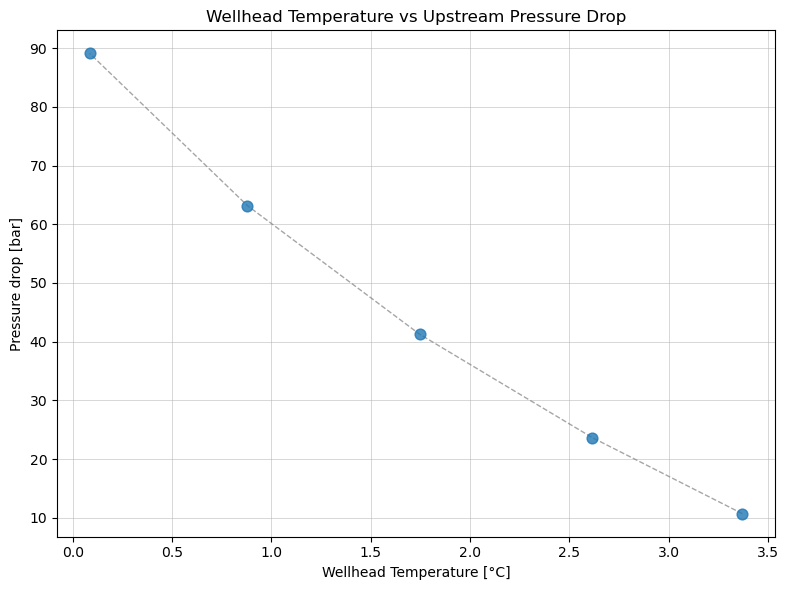

In [26]:
plt.figure(figsize=(8,6))

# Plot points (all same size)
plt.scatter(
    df["wellhead_temp_C"],
    df["pressure_drop_bar"],
    s=60,
    alpha=0.8,
    label="Pressure drop",
    zorder=3
)

# Connect points with a dashed line
plt.plot(
    df["wellhead_temp_C"],
    df["pressure_drop_bar"],
    linestyle="--",
    linewidth=1,
    color="grey",
    alpha=0.7,
    zorder=2
)

plt.xlabel("Wellhead Temperature [°C]")
plt.ylabel("Pressure drop [bar]")
plt.title("Wellhead Temperature vs Upstream Pressure Drop")
plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7, zorder=1)

plt.tight_layout()
plt.show()

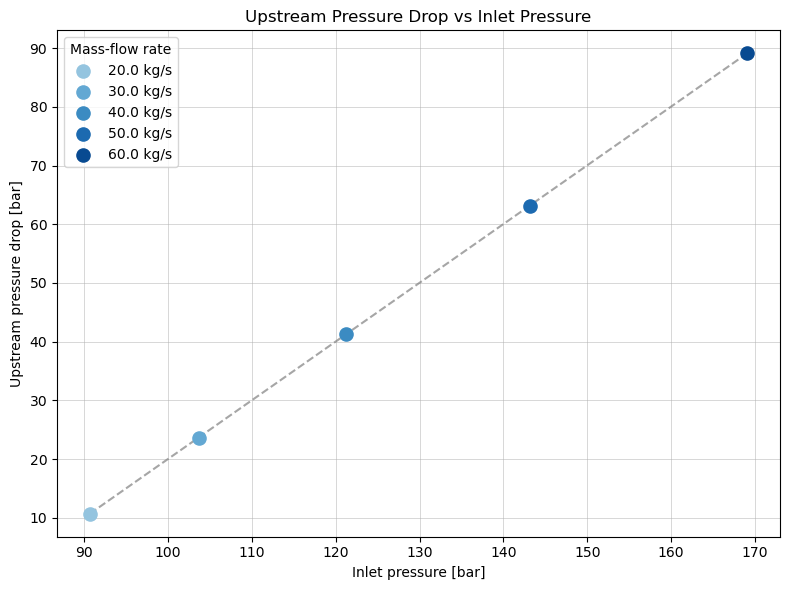

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))

# Sort dataframe by mass flow rate
df_sorted = df.sort_values("mass_flow_rate")

# Create 5 nice blue colors
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(df_sorted)))

# Scatter plot with unique color per mass flow rate
for (m, color) in zip(df_sorted["mass_flow_rate"], colors):
    subset = df_sorted[df_sorted["mass_flow_rate"] == m]
    plt.scatter(
        subset["inlet_pressure_bar"],
        subset["pressure_drop_bar"],
        s=90,
        color=color,
        label=f"{m} kg/s",
        zorder=3
    )

# ONE dashed line connecting all cases
plt.plot(
    df_sorted["inlet_pressure_bar"],
    df_sorted["pressure_drop_bar"],
    linestyle="--",
    linewidth=1.5,
    color="grey",
    alpha=0.7,
    zorder=2
)

plt.xlabel("Inlet pressure [bar]")
plt.ylabel("Upstream pressure drop [bar]")
plt.title("Upstream Pressure Drop vs Inlet Pressure")
plt.grid(True, which='both', linestyle='-', linewidth=0.5, alpha=0.7, zorder=1)

plt.legend(title="Mass-flow rate", loc="upper left")

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()



In [28]:
import os
import json
import pandas as pd
import numpy as np

# --- PATHS ---
base_path = r"C:/Users/amand/Documents/Prosjektoppgave/Ledarunner/runs/05_12_25/run_11_24"

# Load parameter values from inputs.json
with open(os.path.join(base_path, "inputs.json")) as f:
    cfg = json.load(f)

valve_openings = cfg["varying_parameters"]["VALVE_OPENING"]

# Prepare list for results
rows = []

# Loop over the 5 cases
for i, valve in enumerate(valve_openings, start=1):

    case_name = f"case_{i:03d}"
    case_path = os.path.join(base_path, case_name, "trends")

    inj = pd.read_csv(os.path.join(case_path, "InjectionPoint.csv"), encoding="latin1")
    up = pd.read_csv(os.path.join(case_path, "Upstream.csv"), encoding="latin1")

    inj = inj.apply(pd.to_numeric, errors="coerce")
    up = up.apply(pd.to_numeric, errors="coerce")

    # Last 10% for steady state
    n = max(1, len(inj) // 10)

    inlet_pressure = inj["Pressure"].tail(n).mean()
    pressure_drop = up["Pressure drop - total"].tail(n).mean()

    rows.append([case_name, valve, inlet_pressure, pressure_drop])

df_valve = pd.DataFrame(rows, columns=["case", "valve_opening", "inlet_pressure_bar", "pressure_drop_bar"])
df_valve


,case,valve_opening,inlet_pressure_bar,pressure_drop_bar
0,case_001,0.2,145.156850,65.198475
1,case_002,0.4,95.174982,15.218459
2,case_003,0.6,85.881277,5.925183
3,case_004,0.8,83.186459,3.230496
4,case_005,1.0,82.600568,2.644634


In [51]:

import os
import pandas as pd
import numpy as np
import json

# ---- PATH ----
base_path = r"C:/Users/amand/Documents/Prosjektoppgave/Ledarunner/runs/05_12_25/run_11_24"

with open(os.path.join(base_path, "inputs.json")) as f:
    cfg = json.load(f)

valve_openings = cfg["varying_parameters"]["VALVE_OPENING"]

rows = []

for i, vo in enumerate(valve_openings, start=1):

    case_name = f"case_{i:03d}"
    case_folder = os.path.join(base_path, case_name, "trends")

    # Load CSVs
    inj = pd.read_csv(os.path.join(case_folder, "InjectionPoint.csv"), encoding="latin1")
    valve = pd.read_csv(os.path.join(case_folder, "Valve.csv"), encoding="latin1")
    wh = pd.read_csv(os.path.join(case_folder, "Wellhead.csv"), encoding="latin1")

    # Convert everything numeric
    inj = inj.apply(pd.to_numeric, errors="coerce")
    valve = valve.apply(pd.to_numeric, errors="coerce")
    wh = wh.apply(pd.to_numeric, errors="coerce")

    n = max(1, len(valve) // 10)  # last 10%

    # Extract steady-state values
    inj_pressure = inj["Pressure"].tail(n).mean()
    valve_dp = valve["Pressure drop"].tail(n).mean()
    valve_inlet = valve["Pressure (inlet)"].tail(n).mean()
    valve_outlet = valve["Pressure (outlet)"].tail(n).mean()

    wh_temp = wh["Temperature - average"].tail(n).mean()

    rows.append([case_name, vo, valve_inlet, valve_outlet, valve_dp, wh_temp, inj_pressure])

df_extra = pd.DataFrame(
    rows,
    columns=[
        "case",
        "valve_opening",
        "P_inlet_bar",
        "P_outlet_bar",
        "valve_dp_bar",
        "wellhead_temp_C",
        "inlet_pressure_bar"
    ]
)

df_extra


,case,valve_opening,P_inlet_bar,P_outlet_bar,valve_dp_bar,wellhead_temp_C,inlet_pressure_bar
0,case_001,0.2,142.794553,80.002562,62.708902,0.896388,145.156850
1,case_002,0.4,92.700968,80.000619,12.611595,2.688851,95.174982
2,case_003,0.6,83.381107,80.000186,3.290834,3.148557,85.881277
3,case_004,0.8,80.678273,80.000054,0.587723,3.291688,83.186459
4,case_005,1.0,80.090612,80.000025,0.000000,3.323433,82.600568


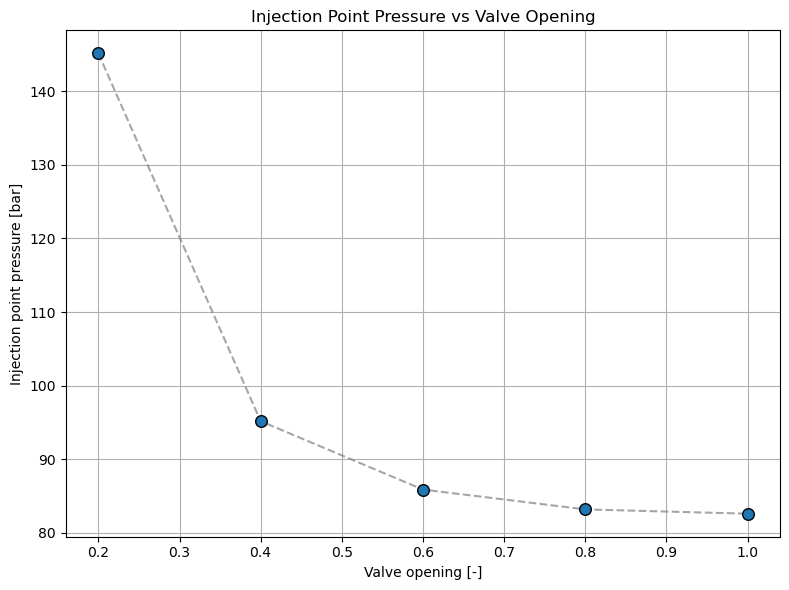

In [52]:
import matplotlib.pyplot as plt

df_sorted = df_valve.sort_values("valve_opening")

plt.figure(figsize=(8,6))

plt.scatter(
    df_sorted["valve_opening"],
    df_sorted["inlet_pressure_bar"],
    s=70,
    edgecolor="black",
    zorder=3
)

plt.plot(
    df_sorted["valve_opening"],
    df_sorted["inlet_pressure_bar"],
    linestyle="--",
    linewidth=1.5,
    color="grey",
    alpha=0.7,
    zorder=2
)

plt.grid(True, zorder=0)

plt.xlabel("Valve opening [-]")
plt.ylabel("Injection point pressure [bar]")
plt.title("Injection Point Pressure vs Valve Opening")

plt.tight_layout()
plt.show()


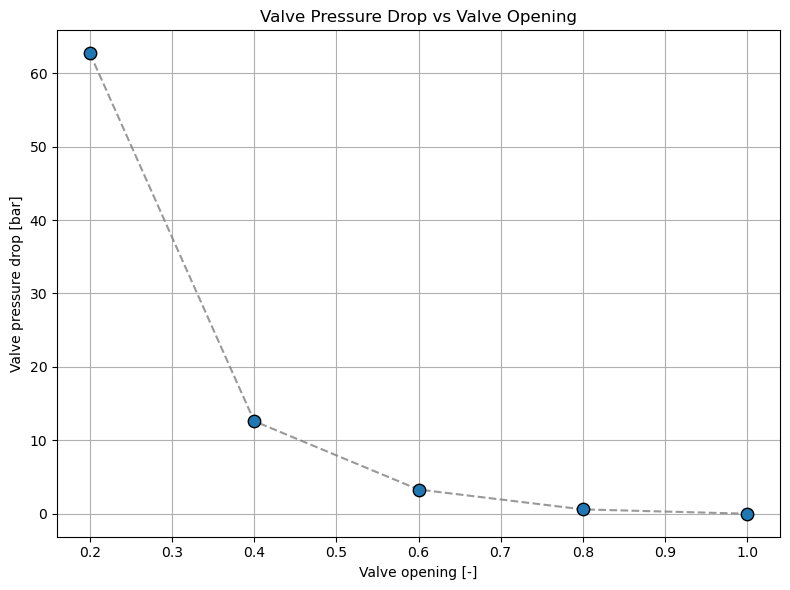

In [53]:
import matplotlib.pyplot as plt

df_sorted = df_extra.sort_values("valve_opening")

plt.figure(figsize=(8,6))

plt.scatter(
    df_sorted["valve_opening"],
    df_sorted["valve_dp_bar"],
    s=80,
    edgecolor="black",
    zorder=3
)

plt.plot(
    df_sorted["valve_opening"],
    df_sorted["valve_dp_bar"],
    linestyle="--",
    linewidth=1.5,
    color="grey",
    alpha=0.8,
    zorder=2
)
plt.grid(True, zorder=0)

plt.xlabel("Valve opening [-]")
plt.ylabel("Valve pressure drop [bar]")
plt.title("Valve Pressure Drop vs Valve Opening")

plt.tight_layout()
plt.show()


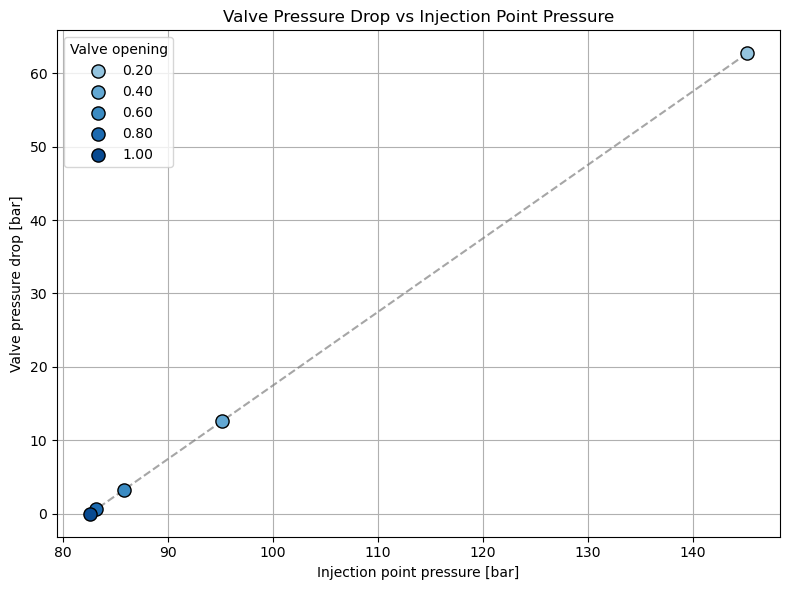

In [57]:
plt.figure(figsize=(8,6))

# Generate 5 blue shades
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(df_sorted)))

for (vo, color) in zip(df_sorted["valve_opening"], colors):
    subset = df_sorted[df_sorted["valve_opening"] == vo]
    plt.scatter(
        subset["inlet_pressure_bar"],
        subset["valve_dp_bar"],
        color=color,
        edgecolor="black",
        s=90,
        label=f"{vo:.2f}",
        zorder=3
    )

plt.plot(
    df_sorted["inlet_pressure_bar"],
    df_sorted["valve_dp_bar"],
    linestyle="--",
    linewidth=1.5,
    color="grey",
    alpha=0.7,
    zorder=2
)

plt.grid(True, zorder=0)
plt.xlabel("Injection point pressure [bar]")
plt.ylabel("Valve pressure drop [bar]")
plt.title("Valve Pressure Drop vs Injection Point Pressure")

plt.legend(title="Valve opening", loc="upper left")

plt.tight_layout()
plt.show()


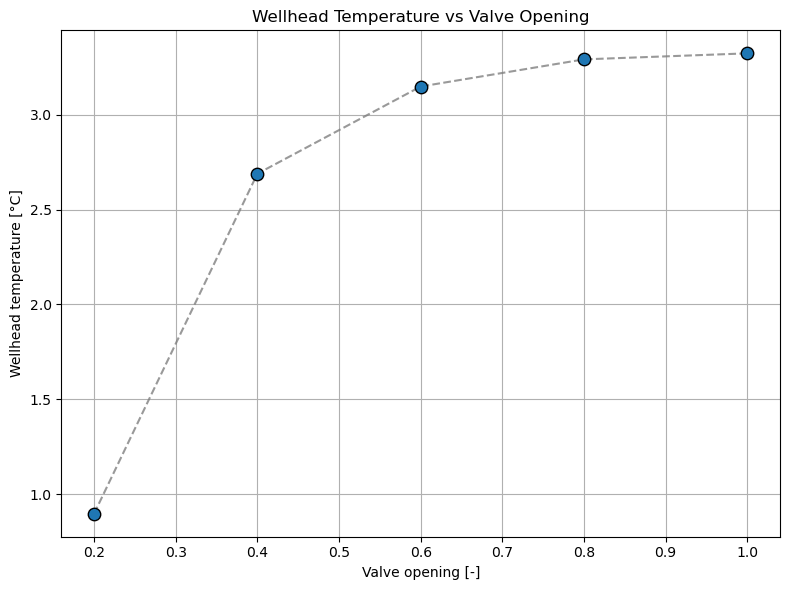

In [55]:
plt.figure(figsize=(8,6))

df_extra_sorted = df_extra.sort_values("valve_opening")

plt.scatter(
    df_extra_sorted["valve_opening"],
    df_extra_sorted["wellhead_temp_C"],
    s=80,
    edgecolor="black",
    zorder=3
)

plt.plot(
    df_extra_sorted["valve_opening"],
    df_extra_sorted["wellhead_temp_C"],
    linestyle="--",
    linewidth=1.5,
    color="grey",
    alpha=0.8,
    zorder=2
)

plt.grid(True, zorder=0)
plt.xlabel("Valve opening [-]")
plt.ylabel("Wellhead temperature [°C]")
plt.title("Wellhead Temperature vs Valve Opening")

plt.tight_layout()
plt.show()


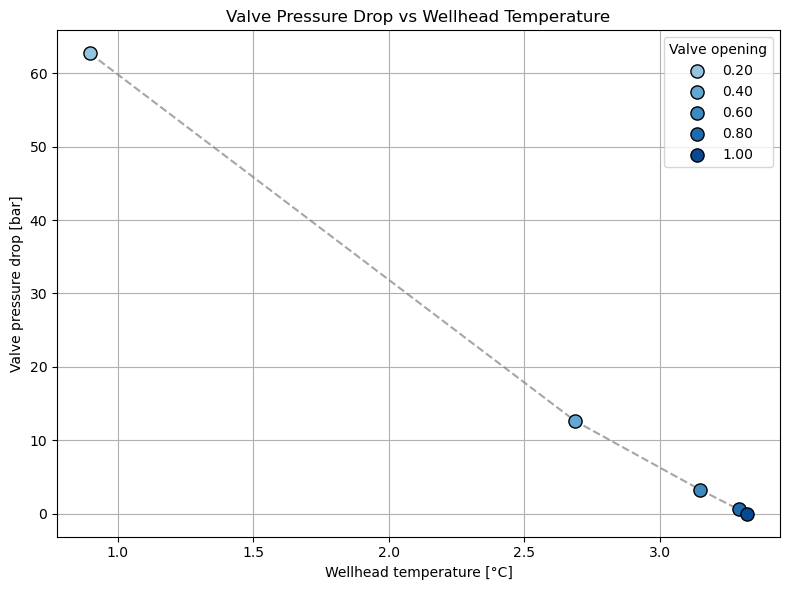

In [59]:
plt.figure(figsize=(8,6))

# Generate 5 blue shades
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(df_sorted)))

for (vo, color) in zip(df_sorted["valve_opening"], colors):
    subset = df_sorted[df_sorted["valve_opening"] == vo]
    plt.scatter(
        subset["wellhead_temp_C"],
        subset["valve_dp_bar"],
        color=color,
        edgecolor="black",
        s=90,
        label=f"{vo:.2f}",
        zorder=3
    )

plt.plot(
    df_sorted["wellhead_temp_C"],
    df_sorted["valve_dp_bar"],
    linestyle="--",
    linewidth=1.5,
    color="grey",
    alpha=0.7,
    zorder=2
)

plt.grid(True, zorder=0)
plt.xlabel("Wellhead temperature [°C]")
plt.ylabel("Valve pressure drop [bar]")
plt.title("Valve Pressure Drop vs Wellhead Temperature")

plt.legend(title="Valve opening", loc="upper right")

plt.tight_layout()
plt.show()